# Bridge model
Candellone Elena, Ghivarello Sara

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#####################################################
#         INVERSE TRANSFORMATION METHOD             #
#   generate a uniform random number u              #
#   find the inverse of the CDF F^-1                #
#   compute t = F^-1(u) = -ln(1-u)/lambda           #
#   therefore, t will be exponentially distributed  #
#####################################################


#PDF
def pdf(x, l):
    return l*np.exp(-l*x)
#CDF
def cdf(x, l):
    return 1 - np.exp(-l*x)

#INVERSE CDF
def icdf(p, l):
    return -np.log(1-p)/l


In [13]:
# exact result for the flux
def Flux(l,t,tb):
    
    x = l*t
    y = l*tb
    
    return l*(2-np.exp(-x))/(2-np.exp(-x)*(1+y)+y)

In [14]:
#######################################################################################
# SIMULATION OF THE SYSTEM                                                            #
# parameters                                                                          #
# l:     lambdas                                                                      #
# times: array of delta_t sampled from the exponential distribution,                  # 
#        i.e. possible difference in time when the particles could enter              #
# tau:   time taken by the particle to exit the channel                               #
# taub:  time for which the channel remains blocked when two particles enter          #
#                                                                                     #
# we used an occupation number (n) to describe the situation inside the channel:      #
# when it is zero a particle can always enter, while when n = 1 it can still enter,   #
# but depending on the sign of delta_t-tau the new occupation number will vary.       #
# In the last case, if delta_t > tau_b, the channel is already free and the particle  #
# can easily enter, while if delta_t < tau_b it cannot enter and we have to take into #
# account that the next particle will arrive after some time and a "portion" of taub  #
# is already passed. This last "trick" is fundamental to count wisely the particles   #
# that enter the channel.                                                             #
# Finally, the flux is calculated as the number of particles that enter the channel   #
# divided by the sum of every delta_t sampled.                                        #
#######################################################################################


def flux_simulated(l,times,tau,taub):
    n = 0                         #occupation number
    N = 0                         #number of accepted particles
    delta_t_0 = 0
    taub_0=taub
    for delta_t in times:
        
        if n == 0:
            N += 1
            n = 1

        elif n == 1:
            if delta_t > tau:
                N += 1
                n = 1
            elif delta_t < tau:
                N += 1
                n = 2

        elif (n == 2 and delta_t > taub_0) :
                N += 1
                n = 1
                taub_0= taub
        elif (n ==2 and delta_t < taub_0) :
                n = 2
                taub_0 = taub_0 - delta_t
        
        
    flux = N / sum(times)
    return flux      

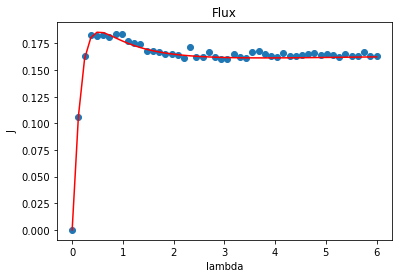

In [23]:
lambdas = np.linspace(0.00001,6,50)
tau = 1
taub = 12
flux_tot = []
for l in lambdas:
    u = np.random.random(2000)
    times = icdf(u,l)
    flux_tot.append(flux_simulated(l,times,tau,taub))
exact_flux = Flux(lambdas,1,12)
plt.title('Flux')
plt.xlabel('lambda')
plt.ylabel('J')
plt.plot(lambdas,exact_flux,'r')
plt.scatter(lambdas,flux_tot)
plt.show()